In [1]:
from scipy.spatial.distance import pdist,squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [2]:
def stepwise_kpca(X,gamma,n_components):
    #implement the RBF kernel PCA
    #X: An mxn dataset  where each sample is a row with n features
    #gamma is the coefficient of RBF kernel 
    
    #1) Calculate the squared Euclidean distances of every pair of points in the mxn dimensional dataset
    #np.sum(np.square(X[3] - X[0])) (the equation being used)
    sq_dists = pdist(X,'sqeuclidean')
    #2) Converting the pairwise distances into a symmetric MxM matrix
    #MxM = MxN * NxM
    mat_sq_dists = squareform(sq_dists)
    #3) Compute the MxM kernel matrix
    K = exp(-gamma*(mat_sq_dists))
    #Centering the symmetric NxN kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + (one_n.dot(K)).dot(one_n)
    #4)Obtaining eigenvalues in descending order with corresponding eigenvectors from symmetric matrix
    eigvals,eigvecs = eigh(K)
    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components + 1)))

    return X_pc


In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100, random_state=123)
fig,ax = plt.subplots(1,1,figsize = (8,6))
ax.scatter(X[y == 0,0],X[y==0,1],color = 'red',alpha = 0.5)
ax.scatter(X[y == 1,0],X[y==1,1],color = 'green',alpha = 0.5)
plt.show()

<Figure size 800x600 with 1 Axes>

In [11]:
val,vec = eigh(squareform(pdist(X,'sqeuclidean')))

In [14]:
X.shape

(100, 2)

In [16]:
val.shape

(100,)

<h2> Using Linear PCA </h2>

Since the above is linearly inseperable, normal PCA would not give good results

In [67]:
from sklearn.decomposition import PCA
lin_pca = PCA(n_components = 1)
X_lin_pca = lin_pca.fit_transform(X)

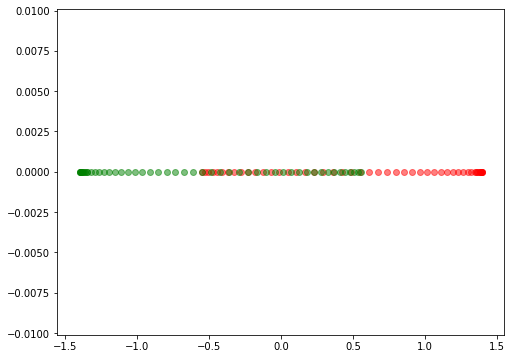

In [68]:
fig,ax1 = plt.subplots(1,1,figsize = (8,6))
ax1.scatter(X_lin_pca[y == 0,0],np.zeros((50,1)),color = 'red',alpha = 0.5)
ax1.scatter(X_lin_pca[y == 1,0],np.zeros((50,1)),color = 'green',alpha = 0.5)
plt.show()

Above is not linearly seperable. 

<h3>Using Gausian Kernel(RBF)</h3>

When using a Kernel like RBF, we are transforming the data into a higher dimension of mxm given that n<m. Hence the eigen vectors are in fact the U of U(sigma)Vt. U is already the eigen vectors if we were to multiply X*V.

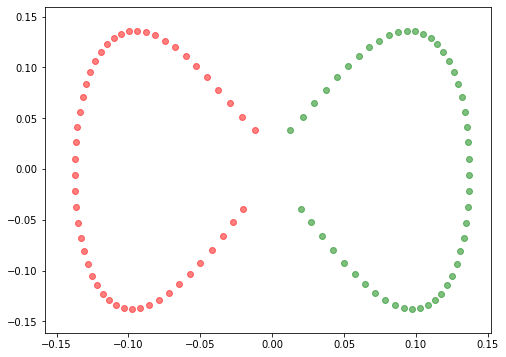

In [84]:
X_pc = stepwise_kpca(X,gamma = 15, n_components = 2)
fig,ax2 = plt.subplots(1,1,figsize = (8,6))
ax2.scatter(X_pc[y == 0,0],X_pc[y == 0,1],color = 'red',alpha = 0.5)
ax2.scatter(X_pc[y == 1,0],X_pc[y == 1,1],color = 'green',alpha = 0.5)
plt.show()

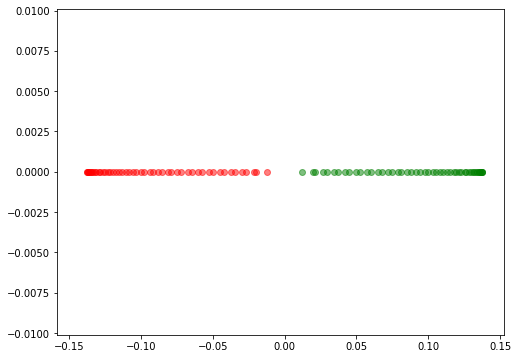

In [85]:
X_pc_one = stepwise_kpca(X,gamma = 15, n_components = 1)
fig,ax3 = plt.subplots(1,1,figsize = (8,6))
ax3.scatter(X_pc_one[y == 0,0],np.zeros((50,1)),color = 'red',alpha = 0.5)
ax3.scatter(X_pc_one[y == 1,0],np.zeros((50,1)),color = 'green',alpha = 0.5)
plt.show()

<h3> Projecting a new point on to the dataset in a low dimension</h3> 

In [106]:
def stepwise_kpca_projection(X,gamma,n_components):
    #implement the RBF kernel PCA
    #X: An mxn dataset  where each sample is a row with n features
    #gamma is the coefficient of RBF kernel 
    
    #1) Calculate the squared Euclidean distances of every pair of points in the mxn dimensional dataset
    #np.sum(np.square(X[3] - X[0])) (the equation being used)
    sq_dists = pdist(X,'sqeuclidean')
    #2) Converting the pairwise distances into a symmetric MxM matrix
    #MxM = MxN * NxM
    mat_sq_dists = squareform(sq_dists)
    #3) Compute the MxM kernel matrix
    K = exp(-gamma*(mat_sq_dists))
    #Centering the symmetric NxN kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + (one_n.dot(K)).dot(one_n)
    #4)Obtaining eigenvalues in descending order with corresponding eigenvectors from symmetric matrix
    eigvals,eigvecs = eigh(K)
    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    alphas = np.column_stack((eigvecs[:,-i] for i in range(1,n_components + 1)))
    lambdas = [eigvals[-i] for i in range(1,n_components+1)]

    return alphas,lambdas

In [107]:
alphas,lambdas = stepwise_kpca_projection(X,gamma=15,n_components=1)

In [108]:
lambdas

[7.062724756679961]

In [117]:
x_new = X[48]
new_dist_pairs = np.array([np.sum((x_new - row)**2) for row in X])
k = np.exp(-15*new_dist_pairs)
projected_x = k.dot(alphas/lambdas)

Projection is made such that K*alpha = lambda*alpha where alpha is the eigenvector, hence we multiply k with (alphas/lambdas)

In [118]:
projected_x

array([-0.11023007])

In [113]:
x_new

array([0.6234898 , 0.78183148])

In [17]:
A = np.array([[1, 2], [3, 4], [5, 6]])

In [21]:
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [31]:
np.mean(A.T,axis = 1)

array([3., 4.])

In [25]:
centered = A - np.mean(A,axis = 0)

In [26]:
centered

array([[-2., -2.],
       [ 0.,  0.],
       [ 2.,  2.]])

In [34]:
(1/2)*np.dot(centered.T,centered)

array([[4., 4.],
       [4., 4.]])

In [36]:
val,vec = np.linalg.eig(np.cov(centered.T))

In [37]:
val

array([8., 0.])

In [38]:
vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(A)

PCA(n_components=2)

In [41]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [42]:
pca.explained_variance_

array([8.00000000e+00, 2.25080839e-33])

In [43]:
pca.explained_variance_ratio_

array([1.00000000e+00, 2.81351049e-34])

In [45]:
pca.n_components

2